In [34]:
!pip install numpy pandas nltk scikit-learn sentence-transformers networkx matplotlib spacy yake
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [35]:
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import networkx as nx
import matplotlib.pyplot as plt
import spacy
import yake
from collections import Counter

In [13]:
# Load Spacy Model
nlp = spacy.load("en_core_web_sm")

In [36]:
# Function to process text data
def extract_top_sentences(sentences, num_sentences):
    # Step 1: Preprocessing
    def preprocess(text):
        doc = nlp(text.lower())
        words = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
        return " ".join(words)

    sentences_cleaned = [preprocess(sentence) for sentence in sentences]

    # Step 2: TF-IDF Based Scoring
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(sentences_cleaned)
    tfidf_scores = np.array(tfidf_matrix.sum(axis=1)).flatten()

    # Step 3: BERT-based Sentence Embeddings
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode(sentences_cleaned)
    similarity_matrix = cosine_similarity(embeddings)

    # Step 4: TextRank Algorithm
    graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank(graph)

    # Step 5: YAKE Keyword Extraction Score
    keyword_extractor = yake.KeywordExtractor()
    keyword_scores = []
    for sentence in sentences_cleaned:
        key_words = keyword_extractor.extract_keywords(sentence)
        keyword_scores.append(sum(score for _, score in key_words))

    # Step 6: Named Entity Recognition (NER) Score
    def ner_score(text):
        doc = nlp(text)
        return len([ent for ent in doc.ents])  # Count named entities

    ner_scores = [ner_score(sentence) for sentence in sentences_cleaned]

    # Combine Scores for Ranking
    final_scores = (tfidf_scores + np.array(list(scores.values())) + np.array(keyword_scores) + np.array(ner_scores)) / 4

    # Step 7: Extract Top Sentences
    ranked_sentences = sorted(zip(final_scores, sentences), reverse=True, key=lambda x: x[0])

    return ranked_sentences


In [37]:
# Example Usage
num_total_sentences = 100  # Change this as needed
num_top_sentences = 10  # Change this as needed
sentences = [
    "Artificial intelligence is transforming various industries worldwide.",
    "Climate change is a significant global challenge that requires urgent action.",
    "Quantum computing has the potential to revolutionize encryption and data security.",
    "The rise of electric vehicles is reducing dependence on fossil fuels.",
    "Advancements in medical technology are improving patient outcomes.",
    "Machine learning algorithms are being used to detect fraudulent transactions.",
    "The global economy is experiencing shifts due to geopolitical tensions.",
    "Remote work has become more prevalent due to the COVID-19 pandemic.",
    "Space exploration is entering a new era with private companies launching missions.",
    "Renewable energy sources like solar and wind are gaining traction worldwide.",
    "Cybersecurity threats are evolving, requiring continuous updates and monitoring.",
    "Autonomous vehicles are being tested in multiple cities around the world.",
    "Cryptocurrency adoption is increasing despite regulatory challenges.",
    "The healthcare industry is leveraging big data for predictive analytics.",
    "Education is shifting towards online learning platforms post-pandemic.",
    "5G networks are enabling faster connectivity and new technological applications.",
    "Governments are enacting policies to combat climate change more aggressively.",
    "AI-powered chatbots are enhancing customer service experiences.",
    "The Internet of Things (IoT) is connecting devices for smart automation.",
    "Biotechnology breakthroughs are leading to new treatments for genetic disorders.",
    "E-commerce sales have surged due to changes in consumer behavior.",
    "Blockchain technology is being explored for secure and transparent transactions.",
    "The entertainment industry is leveraging AI to personalize recommendations.",
    "Advancements in robotics are improving automation in various industries.",
    "The gig economy is reshaping traditional employment structures.",
    "Social media platforms are facing scrutiny over data privacy issues.",
    "Wearable technology is enabling real-time health monitoring.",
    "Augmented reality (AR) is transforming retail and gaming experiences.",
    "Urban planning is being optimized using big data analytics.",
    "The demand for cybersecurity professionals is growing exponentially.",
    "Genetic engineering is unlocking new possibilities in agriculture.",
    "Cloud computing services are enabling scalable business solutions.",
    "Facial recognition technology is being debated due to privacy concerns.",
    "Neural networks are improving the accuracy of speech recognition software.",
    "Smart home devices are automating daily household tasks.",
    "The fashion industry is adopting sustainable production methods.",
    "Traditional banking is being disrupted by fintech innovations.",
    "Data science is playing a crucial role in decision-making across industries."
]  # Replace with actual data

ranked_sentences = extract_top_sentences(sentences, num_top_sentences)
top_sentences = [sent[1] for sent in ranked_sentences[:num_top_sentences]]


Top 10 Informative Sentences:
1. Cloud computing services are enabling scalable business solutions.
2. Smart home devices are automating daily household tasks.
3. Quantum computing has the potential to revolutionize encryption and data security.
4. Renewable energy sources like solar and wind are gaining traction worldwide.
5. Space exploration is entering a new era with private companies launching missions.
6. Advancements in medical technology are improving patient outcomes.
7. Climate change is a significant global challenge that requires urgent action.
8. Social media platforms are facing scrutiny over data privacy issues.
9. Data science is playing a crucial role in decision-making across industries.
10. Cybersecurity threats are evolving, requiring continuous updates and monitoring.


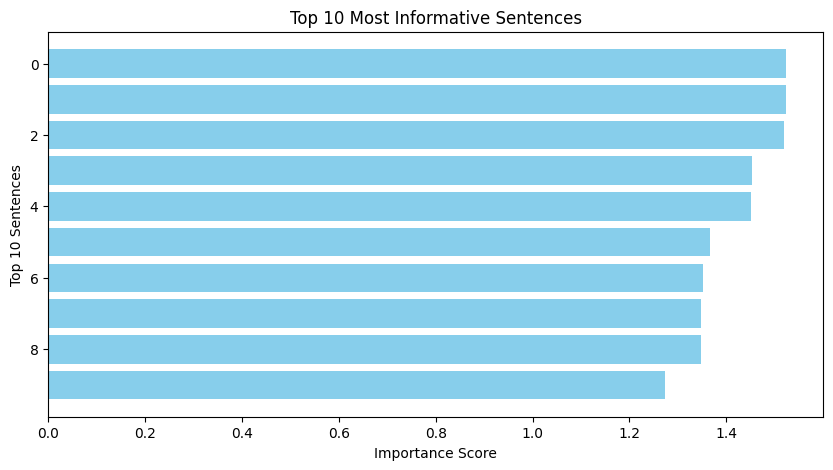

In [38]:
# Step 8: Display Results
print(f"Top {num_top_sentences} Informative Sentences:")
for i, sentence in enumerate(top_sentences, 1):
    print(f"{i}. {sentence}")

# Visualization
plt.figure(figsize=(10, 5))
plt.barh(range(num_top_sentences), [score for score, _ in ranked_sentences[:num_top_sentences]], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel(f'Top {num_top_sentences} Sentences')
plt.title(f'Top {num_top_sentences} Most Informative Sentences')
plt.gca().invert_yaxis()
plt.show()
